Calculate synthetics from the **Marmousi 2** model © 2019- Kajetan Chrapkiewicz.

#### Notebook config

In [1]:
# %load ../../fullwavepy/config/jupyter.py 
from fullwavepy import * # Load modules imported in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook
# -----------------------------------------------------------------------------
# Set matplotlib backend
# -----------------------------------------------------------------------------
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# interactive plots displayed in a notebook cell
# %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# Set matplotlib style
# ----------------------------------------------------------------------------
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot'])
# print(plt.style.available) 
# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers and load the log_lvl function
from fullwavepy.config.logging import *
# -----------------------------------------------------------------------------
# Set level of log-messages
log_lvl(INFO) 
# Other options in order of increasing importance and 
# decreasing verbosity:
# TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50, respectively
# -----------------------------------------------------------------------------
# Autocompleting
# -----------------------------------------------------------------------------
#  Not sure if it works
#%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 2

Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


In [2]:
exe = dict(
    segyprep='/home/kmc3817/Dropbox/light_PhD/fullwave3D/segyprep_v3.16/bin/segyprep_v3.16',
    fullwave='/home/kmc3817/rds_home/my_phd/fullwave3D/rev690'
)

# Intro

In this example, we will generate synthetic pressure data from the vp model of Marmousi2 (Martin et al. al, 2006). This model is the laterally extended version of the original Marmousi model, with the additional water layer on top and the vs model (not used in this example). The density model will be derived implicitly inside `FULLWAVE3D` using the Gardner's relationship between vp and density.  

# Get the model

The model can be obtained from:

https://s3.amazonaws.com/open.source.geoscience/open_data/elastic-marmousi/elastic-marmousi-model.tar.gz


The archive is relatively heavy (~150 MB). Here, the vp model has already been downloaded, unpacked, cut (to preserve only its central region) and resampled to grid interval of 12.5 m. It can be accessed at:

In [3]:
model_path = 'downloaded/marmousi2_vp.sgy'
!ls {model_path}

downloaded/marmousi2_vp.sgy


In [15]:
from fullwavepy.seismic.models import ModelVp
m = ModelVp(model_path)

INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


# Prepare input

In [4]:
p = ProjSyn('marm2d', exe=exe, dt=0.001, ns=6000, dx=12.5, dims=(1361,1,281),
            cluster='cx1',
            info='Calculate synthetics from 2d Marmousi2 model.')

Content of  .//marm2d/marm2d-Info.txt : 

Calculate synthetics from 2d Marmousi2 model.
 
INFO:fullwavepy.project.generic.au.ProjDef.__init__: 
-----------------------------------------
Project definition
-----------------------------------------
problem             :           synthetic
domain              :                time
dim                 :                  3d
equation            :            acoustic
anisotropy          :                none
kernel              :                 low
io                  :                 sgy
units               :              metric
qp                  :                   0
qs                  :                   0
INFO:fullwavepy.project.generic.au.ProjSgyMapp.__init__: Setting SEG-Y mapping (sgyhw) to Fullwave3D's default.
INFO:fullwavepy.project.generic.au.ProjCluster.__init__: Setting cluster to:  cx1.
INFO:fullwavepy.project.files.text.runfiles.Runfile.read_blocks: new_block_activator=nits => each iteration block must begin with nits key

In [16]:
p.i.tvp.create(m)

INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


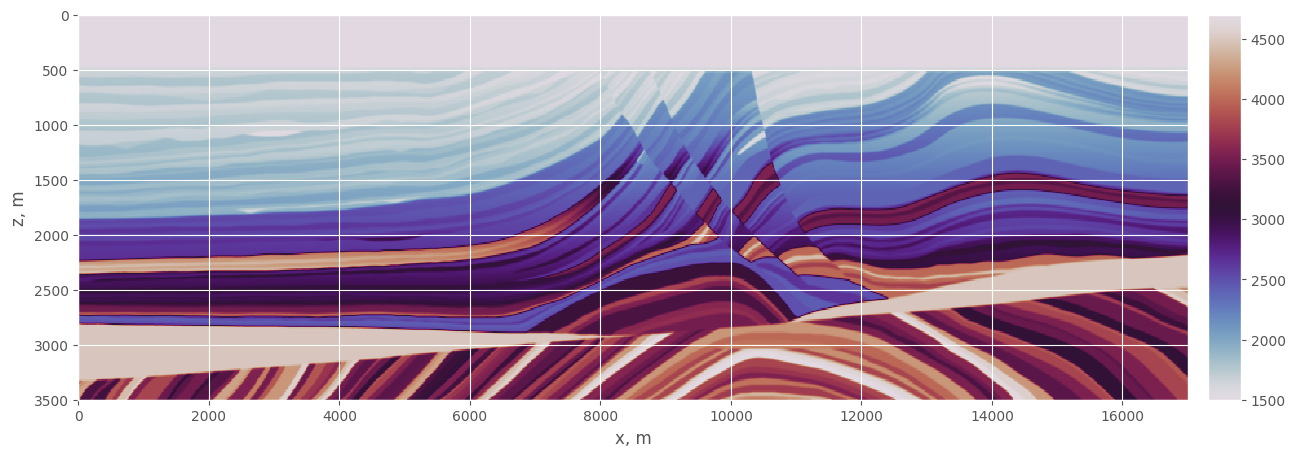

In [17]:
# plot 
figure(15,5)
p.i.tvp.plot(coord=0, title=None)
plt.xlabel('x, m')
plt.ylabel('z, m')
plt.show()

In [18]:
from fullwavepy.numeric.funcs import ricker
fpeak = 3 # Hz
p.i.rsg.create(ricker(fpeak, p.ns, p.dt))

INFO:fullwavepy.dsp.phase.first_breaks: Picking first breaks as first sample above 0.001 of the max amplitude of the trace.


In [19]:
p.i.sp.create()

In [20]:
p.i.sp.create(ztype='d', geometry='regular', geometry_in_nodes=True,
              souz=11, soux0=11, soudx=10, sounx=200,
              recz=11, recx0=21, recdx=5, recnx=500)
p.i.sp.cat()

Content of  .//marm2d//inp/marm2d-SegyPrep.key : 
FFID : yes
addtodepth : 0
debug : yes
dtms : 1.0
dx : 12.5
fixedarray : yes
geometry : regular
io : sgy
maxoffset : 1000000.0
minoffset : 0
nx1 : 1361
nx2 : 1
nx3 : 281
outseis : yes
outsource : yes
problem : synthetic
recdx : 62.5
recdy : 1
reciprocity : 0
recnx : 500.0
recny : 0
recx0 : 250.0
recy0 : 0
recz : 137.5
retain : yes
soudx : 125.0
soudy : 0
sounx : 200.0
souny : 1
soux0 : 125.0
souy0 : 0
souz : 137.5
text : yes
ttime : 6000.0
unique : yes
ztype : d
 


In [5]:
p.i.sp.run()

INFO:fullwavepy.project.files.text.runfiles.SegyPrepFile.run: Running SegyPrep...

 SEGYPREP  -  Version 3.16.04                                                     
 ********

 Data preparation for 2D & 3D wavefield tomography

 Project name set to marm2d
 Preparing files for synthetics...

 Grid points in-line:                   1361
 Grid points cross-line:                   1
 Grid points vertically:                 281
 Horiz grid spacing (metres):      12.5000000    
 Vert grid spacing (metres):       12.5000000    
 Model length (metres):            17000.0000    
 Model width (metres):             0.00000000    
 Model depth (metres):             3500.00000    

 Modelling time step (ms):         1.00000000    
 Output data delta-T (ms):         1.00000000    
 Output data length (ms):          6000.00000    
 Output data length (samples):          6000
 Time steps to model:                   6000

 Receiver-array fixed in space:          yes
 Use composite shots:              

In [6]:
p.i.ske.cat()

Content of  .//marm2d//inp/marm2d-Skeleton.key : 

 ! Skeleton Runfile for FULLWAVE3D
 ! Generated on October 06, 2021, at 16:11:10
 ! By SEGYPREP, Version 3.16.04
 ! For project marm2d

 ! Problem type
 Problem         : synthetic
 Units           : metric
 Equation        : acoustic
 Domain          : time
 Kernel          : high     ! ** change for low kernel
 Anisotropy      : VTI
 TTI units       : fraction ! ** change for percent
 Probdims        : 2D
 IO              : SEGY

 ! Model size
 NX1             :         1361
 NX2             :            1
 NX3             :          281
 DX              :    12.5000000  ! metres
 MAX TIME        :    6000.00000  ! ms
 FD time step    :    1.00000000  ! ms

 ! Numbers of shots and receivers
 NCOMP           :          136
 NSHOT           :          136
 MAXPS           :            1
 NRECS           :          269
 MAXRC           :          269

 ! Free surface boundary at top, absorbing elsewhere
 B top           : -99
 B left   

In [7]:
p.i.rnf.create()
p.i.rnf.cat()

INFO:fullwavepy.project.files.text.runfiles.Runfile.create: Using some values from .//marm2d//inp/marm2d-Skeleton.key. To modify that file, update SegyPrep.key and re-run SegyPrep
Content of  .//marm2d//inp/marm2d-Runfile.key : 

    ! May 2019, K. Chrapkiewicz 
    ! THIS RUNFILE CONFORMS TO
    ! FULLWAVE REV. 688 STANDARD
    
    
    ! A. PROBLEM DEFINITION
     problem       : synthetic
     domain        : time
     dim           : 2d
     equation      : acoustic
     units         : metric
     anisotropy    : none
     kernel        : low
    
     
    ! B. MODEL DEFINITION
     nx1           : 1361
     nx2           : 1
     nx3           : 281
     dx            : 12.5000000
    
     
    ! C. DATA DEFINITION
     ncomp         : 136
     nshots        : 136
     nrecs         : 269
     maxrc         : 269
     maxps         : 1
     io            : segy
    
     
    ! D. BOUNDARY CONDITIONS
     ibfs          : 0
     multisurf     : 0
     nosprdfctrs   : 0     
   

In [10]:
p.i.rnf.modify(bleft=41)
p.i.rnf.read()

{'accuracy': '0.001',
 'agc': 'off',
 'amplitude': 'no',
 'anisotropy': 'none',
 'bback': '40',
 'bbot': '40',
 'bfront': '40',
 'bleft': '41',
 'bright': '40',
 'btop': '0',
 'conj': 'no',
 'dim': '2d',
 'domain': 'time',
 'dx': '12.5000000',
 'ebac': '50',
 'ebot': '50',
 'efro': '50',
 'elef': '50',
 'equation': 'acoustic',
 'erig': '50',
 'etime': '6.0',
 'etop': '0',
 'func': 'twonorm',
 'gvel': '1600',
 'gwidth': '0.0',
 'ibfs': '0',
 'interpmode': '1',
 'io': 'segy',
 'iprop': 'vp',
 'kernel': 'low',
 'maxghostiter': '2',
 'maxps': '1',
 'maxrc': '269',
 'minfictfs': '0.5',
 'minghostfs': '0.001',
 'multisurf': '0',
 'nblock': '0',
 'ncomp': '136',
 'normalise': 'yes',
 'nosprdfctrs': '0',
 'nrecs': '269',
 'nshots': '136',
 'nx1': '1361',
 'nx2': '1',
 'nx3': '281',
 'problem': 'synthetic',
 'sealevel': '0',
 'slowness': 'yes',
 'spatial': 'yes',
 'sx1': '2.0',
 'sx2': '2.0',
 'sx3': '1.0',
 'units': 'metric',
 'usewin': 'no',
 'vacuum': '0',
 'velcut': '1550',
 'wden': '1000',

In [6]:
p.i.pbs.no[0].create()
p.i.pbs.no[0].cat()

INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._set_resources: Queue selected: pqmrwarn
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: No. of shots in the runfile (ncomp): 136
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: mpiprocs not specified. It will be chosen to maximize a decimal part of nshots / (mpiprocs-1) for a given select=
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: Max. decimal place 0.4871794871794872 is for mpiprocs: 40 and ompthreads: 1
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: There are mpiprocs value(s) that give integer: nshots / (mpiprocs-1)
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: mpiprocs: 5, ompthreads: 8
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: mpiprocs: 2, ompthreads: 20


Content of  .//marm2d//inp/marm2d-Run0.pbs : 
#!/bin/bash

##
# FULLWAVE3D WILL BE RUN FROM proj/out/
# For more explanation, see help(fullwavepy.project.files.runfiles.PbsFile).
#
##

#PBS -N marm2d
#PBS -o ../out/marm2d-JobOut0.log
#PBS -e ../out/marm2d-JobErr0.log
#PBS -l walltime=01:00:00
#PBS -l select=1:mpiprocs=2:ompthreads=20:ncpus=40:mem=128gb
#PBS -l place=scatter:excl

start=`date +%s`

    # PATHS
    code_path=/home/kmc3817/rds_home/my_phd/fullwave3D/rev690
    echo 'code_path: '${code_path}

    work_dir=$PBS_O_WORKDIR/../out/ # $PBS_O_WORKDIR IS THE ONE CONTAINING THIS SCRIPT
    
    # CAVEAT  
    rm $work_dir/marm2d-Runfile.key   
    rm $work_dir/marm2d-Ghost.*


    # HARD-LINK INPUT FILES TO OUTPUT DIR WHERE THE CODE WILL RUN
    ln $PBS_O_WORKDIR/* $work_dir
    
    # CHANGE DIRECTORY TO PROJECT OUTPUT
    cd $work_dir
    
    
# DISABLE PINNING OF THE PROCESSES (MAKE ALL NODE CORES AVAILABLE TO ALL PROCESSES)
unset NCPUS
export I_MPI_PIN=no # (DOES NOT WORK IF 

# References

Martin, G. et al. (2006) *Marmousi2: An elastic upgrade for Marmousi*, Leading Edge, vol. 25 (2), <a href="https://library.seg.org/doi/10.1190/1.2172306">doi:10.1190/1.2172306</a>

# ...